# Practical 3
#### [ ID: 17CE016 ]
---
#### Aim: Vehicle data analysis using matplotlib and seaborn

#### Theory:
Data visualization refers to techniques used to communicate insights from data through visual representation. Its main goal is to distill large datasets into visual graphics to allow for easy understanding of complex relationships within the data. It is often used interchangeably with terms such as information graphics, statistical graphics, and information visualization.

It is one of the steps of the data science process developed by Joe Blitzstein, which is a framework for approaching data science tasks. After data is collected, processed, and modeled, the relationships need to be visualized so a conclusion can be made.

It’s also a component of the broader discipline of data presentation architecture (DPA), which seeks to identify, locate, manipulate, format, and present data in the most efficient way.

##### Seaborn Library:
Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.
Here is some of the functionality that seaborn offers:
- A dataset-oriented API for examining relationships between multiple variables
- Specialized support for using categorical variables to show observations or aggregate statistics
- Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
- Automatic estimation and plotting of linear regression models for different kinds dependent variables
- Convenient views onto the overall structure of complex datasets
- High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
- Concise control over matplotlib figure styling with several built-in themes
- Tools for choosing color palettes that faithfully reveal patterns in your data

##### Matplotlib Library:
Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. It was introduced by John Hunter in the year 2002.

One of the greatest benefits of visualization is that it allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib consists of several plots like line, bar, scatter, histogram etc.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
df=pd.read_csv("dataset\Automobile_data.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.drop(['normalized-losses'],axis=1,inplace=True)

In [5]:
for i in df.columns:
    for j in range(len(df)):
        if df[i][j]=="?":
            df[i][j]=np.nan

c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
df['num-of-doors']=df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [7]:
df['bore']=df['bore'].fillna(round(df['bore'].astype(float).mean(),2))
df['stroke']=df['stroke'].fillna(round(df['stroke'].astype(float).mean(),2))

In [8]:
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].median())
df['price']=df['price'].fillna(round(df['price'].astype(float).median()))

In [9]:
df['horsepower']=df['horsepower'].fillna(round(df['horsepower'].astype(float).median()))

In [10]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

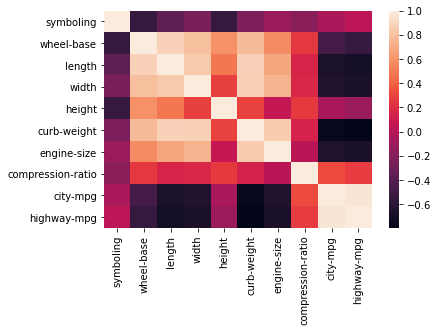

In [12]:
sns.heatmap(df.corr())

In [13]:
high_corr=['wheel-base','width','curb-weight','engine-size','highway-mpg']

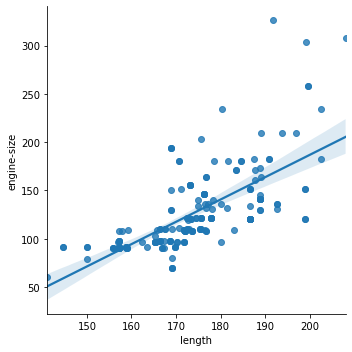

In [14]:
sns.lmplot(x='length',y='engine-size',data=df)

In [15]:
df.drop(high_corr,axis=1,inplace=True)

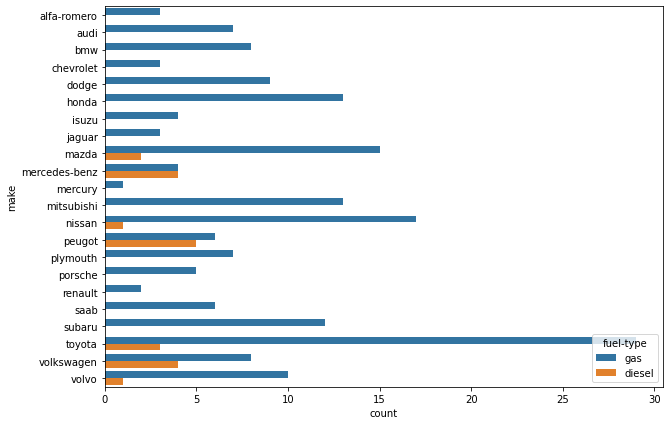

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(y=df['make'],hue=df['fuel-type'])

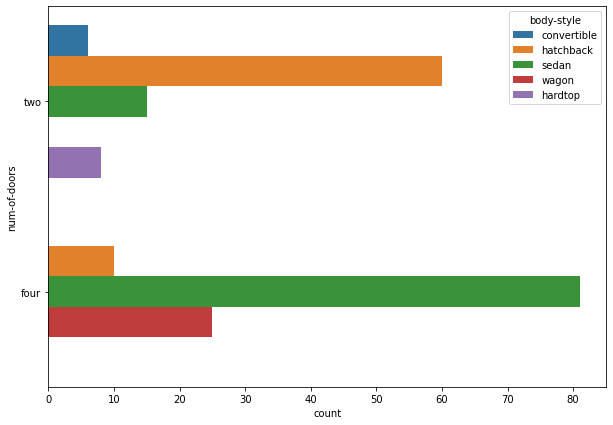

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(y=df['num-of-doors'],hue=df['body-style'])

In [22]:
df['price']=df['price'].astype(int)

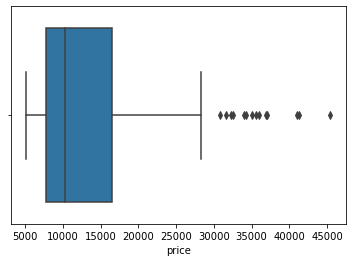

In [23]:
sns.boxplot(df['price'])

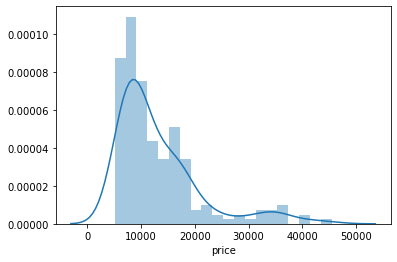

In [24]:
sns.distplot(df['price'],bins=20)

In [25]:
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)

In [26]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,height,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,19,16500
3,2,audi,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,mpfi,3.19,3.40,10.0,102,5500,24,13950
4,2,audi,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,mpfi,3.19,3.40,8.0,115,5500,18,17450


In [27]:
# df.info()
df['horsepower']=df['horsepower'].astype(int)
df['peak-rpm']=df['peak-rpm'].astype(int)

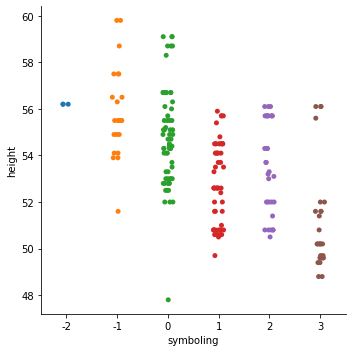

In [28]:
sns.catplot(x='symboling',y='height',data=df)

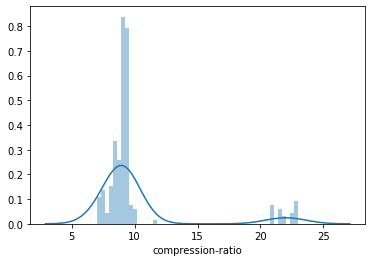

In [29]:
sns.distplot(df['compression-ratio'])

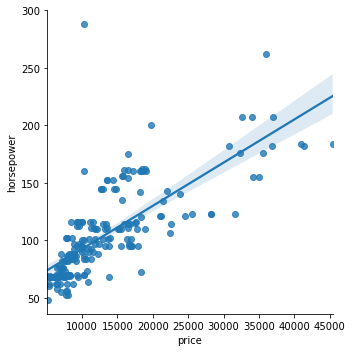

In [30]:
sns.lmplot(x='price',y='horsepower',data=df)

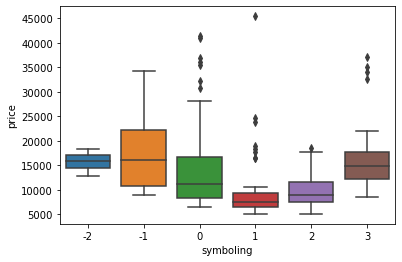

In [31]:
sns.boxplot(x="symboling", y="price",data=df)

---
## Conclusion:
From this practical, I learned following things:
- Data visualization just not makes data more beautiful but also provides insight into complex data sets 
- Helps in identifying areas that need attention or improvement.
- Helps to understand which fields to place where
- Helps to predict scenarios and more.


---